In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
k_file = '/Users/james/Desktop/gaia_tmp/kepler_dr2_1arcsec.fits'
k2_file = '/Users/james/Desktop/gaia_tmp/k2_dr2_1arcsec.fits'

kep = Table.read(k_file, format='fits')
k2 = Table.read(k2_file, format='fits')

In [63]:
# write some smaller files for Jen
c4 = k2[np.where((k2['k2_campaign_str'] == '4'))[0]]
c7 = k2[np.where((k2['k2_campaign_str'] == '7'))[0]]

c4.write('c4.fits', format='fits')
c7.write('c7.fits', format='fits')

(-90, 90)

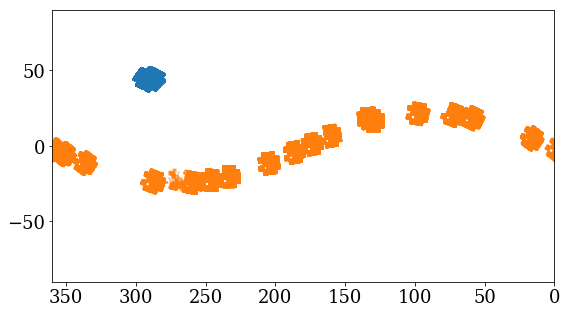

In [7]:
plt.figure(figsize=(9,5))
plt.scatter(kep['ra'], kep['dec'], s=3, alpha=0.3)
plt.scatter(k2['ra'], k2['dec'], s=3, alpha=0.3)
plt.xlim(360, 0)
plt.ylim(-90,90)

In [8]:
k2.colnames

['designation',
 'source_id',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'duplicated_source',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'bp_g',
 'g_rp',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag',
 'l',
 'b',
 'ecl_lon',
 'ecl_lat',
 'teff_val',
 'teff_percentile_lower',
 'teff_percentile_upper',
 'a_g_val',
 'a_g_percentile_lower',
 'a_g_percentile_upper'

Text(0,0.5,'$M_G$ (mag)')

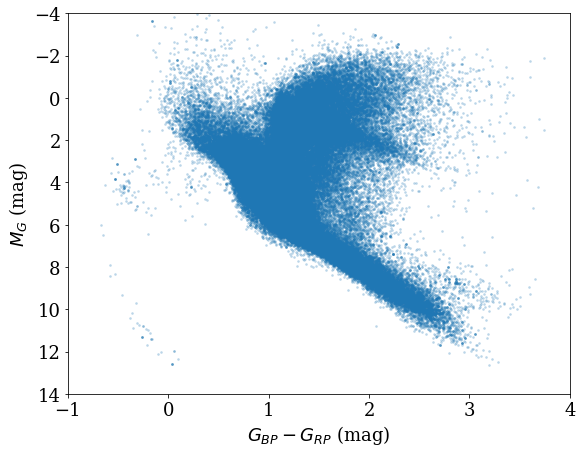

In [16]:
ok2 = np.where((k2['parallax'] > 0) & 
               (k2['parallax_error'] < 0.1) & 
               np.isfinite(k2['parallax']) & 
               (k2['r_modality_flag'] == 1) & 
               (k2['r_result_flag'] == 1) &
               np.isfinite(k2['bp_rp']) & 
               (k2['phot_bp_mean_flux_error']/k2['phot_bp_mean_flux'] < 0.01) & 
               (k2['phot_rp_mean_flux_error']/k2['phot_rp_mean_flux'] < 0.01) & 
               (k2['phot_g_mean_flux_error']/k2['phot_g_mean_flux'] < 0.01))[0]

plt.figure(figsize=(9,7))
plt.scatter(k2['bp_rp'][ok2],  k2['phot_g_mean_mag'][ok2]- 5. * np.log10(k2['r_est'][ok2]) + 5, 
            s=3, alpha=0.2)
plt.ylim(14, -4)
plt.xlim(-1, 4)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

Text(0,0.5,'$M_G$ (mag)')

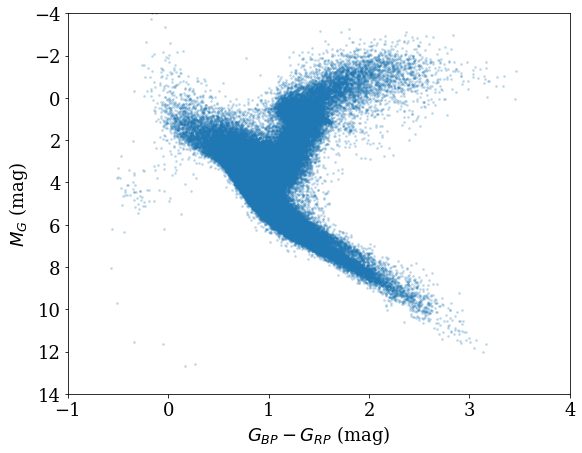

In [19]:
ok = np.where((kep['parallax'] > 0) & 
               (kep['parallax_error'] < 0.1) & 
               np.isfinite(kep['parallax']) & 
               (kep['r_modality_flag'] == 1) & 
               (kep['r_result_flag'] == 1) &
               np.isfinite(kep['bp_rp']) & 
               (kep['phot_bp_mean_flux_error']/kep['phot_bp_mean_flux'] < 0.01) & 
               (kep['phot_rp_mean_flux_error']/kep['phot_rp_mean_flux'] < 0.01) & 
               (kep['phot_g_mean_flux_error']/kep['phot_g_mean_flux'] < 0.01))[0]

plt.figure(figsize=(9,7))
plt.scatter(kep['bp_rp'][ok],  kep['phot_g_mean_mag'][ok]- 5. * np.log10(kep['r_est'][ok]) + 5, 
            s=3, alpha=0.2)
# plt.scatter(k2['bp_rp'][ok2],  k2['phot_g_mean_mag'][ok2]- 5. * np.log10(k2['r_est'][ok2]) + 5, 
#             s=3, alpha=0.2)
plt.ylim(14, -4)
plt.xlim(-1, 4)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

# Goal: Sub-Subgiant Stars?
Look at M67 (in K2) to define window of interesting stars

Then do mixture model (or something) to find new ones in the field!

Text(0,0.5,'$m_G$ (mag)')

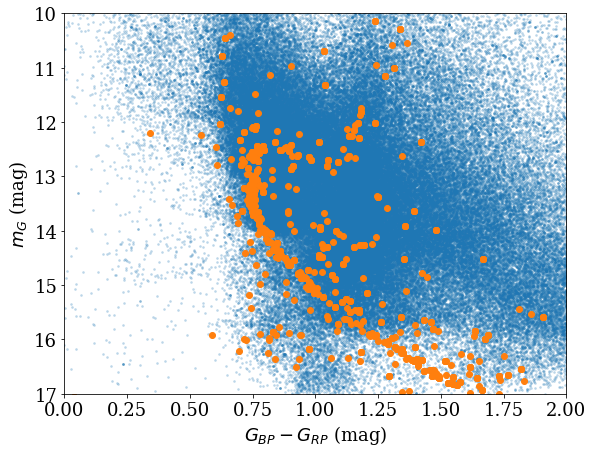

In [32]:
ra_m67 = 132.82
de_m67 = 11.8


x67 = np.where((np.sqrt((k2['ra'][ok2] - ra_m67)**2 + (k2['dec'][ok2] - de_m67)**2) < 0.45))

plt.figure(figsize=(9,7))
plt.scatter(k2['bp_rp'][ok2],  k2['phot_g_mean_mag'][ok2],#- 5. * np.log10(k2['r_est'][ok2]) + 5, 
            s=3, alpha=0.2)

plt.scatter(k2['bp_rp'][ok2][x67],  k2['phot_g_mean_mag'][ok2][x67])#- 5. * np.log10(k2['r_est'][ok2][x67]) + 5)
plt.ylim(17, 10)
plt.xlim(0,2)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$m_G$ (mag)')

Text(0,0.5,'$m_G$ (mag)')

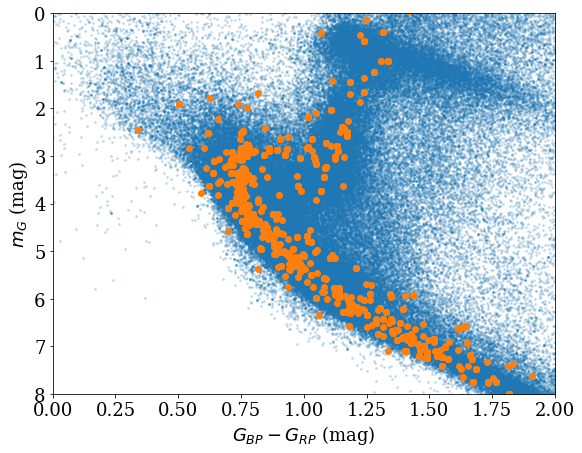

In [33]:
plt.figure(figsize=(9,7))
plt.scatter(k2['bp_rp'][ok2],  k2['phot_g_mean_mag'][ok2] - 5. * np.log10(k2['r_est'][ok2]) + 5, 
            s=3, alpha=0.2)

plt.scatter(k2['bp_rp'][ok2][x67],  k2['phot_g_mean_mag'][ok2][x67] - 5. * np.log10(k2['r_est'][ok2][x67]) + 5)
plt.ylim(8, 0)
plt.xlim(0,2)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$m_G$ (mag)')